In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files
uploaded = files.upload()


Saving LT_15min_FINAL.csv to LT_15min_FINAL.csv


In [4]:
raw_data=pd.read_csv('LT_15min_FINAL.csv')

In [5]:
uploaded

{'LT_15min_FINAL.csv': b'Datetime,Open,High,Low,Close,Volume,EMA\n2021-04-26 09:15:00+05:30,1330.05,1335.2,1323.3,1327.65,142110,0\n2021-04-26 09:30:00+05:30,1327.65,1341.1,1327.65,1335.0,155521,0\n2021-04-26 09:45:00+05:30,1335.15,1340.4,1332.45,1336.0,84717,0\n2021-04-26 10:00:00+05:30,1335.75,1337.75,1331.65,1332.65,50965,0\n2021-04-26 10:15:00+05:30,1332.65,1337.7,1332.25,1336.0,42021,0\n2021-04-26 10:30:00+05:30,1336.0,1336.0,1328.9,1331.0,49833,0\n2021-04-26 10:45:00+05:30,1331.0,1332.85,1328.0,1332.5,47623,0\n2021-04-26 11:00:00+05:30,1332.5,1338.65,1332.45,1338.4,55646,0\n2021-04-26 11:15:00+05:30,1338.4,1339.0,1336.25,1337.3,40426,0\n2021-04-26 11:30:00+05:30,1337.1,1339.95,1336.05,1337.15,50356,0\n2021-04-26 11:45:00+05:30,1337.3,1338.5,1336.05,1337.45,31652,0\n2021-04-26 12:00:00+05:30,1337.45,1338.5,1334.0,1335.65,41747,0\n2021-04-26 12:15:00+05:30,1335.6,1336.9,1330.0,1331.4,42837,0\n2021-04-26 12:30:00+05:30,1331.05,1333.0,1329.55,1333.0,43436,0\n2021-04-26 12:45:00+05:30

In [6]:
raw_data

,Datetime,Open,High,Low,Close,Volume,EMA
0,2021-04-26 09:15:00+05:30,1330.05,1335.2,1323.3,1327.65,142110,0
1,2021-04-26 09:30:00+05:30,1327.65,1341.1,1327.65,1335.0,155521,0
2,2021-04-26 09:45:00+05:30,1335.15,1340.4,1332.45,1336.0,84717,0
3,2021-04-26 10:00:00+05:30,1335.75,1337.75,1331.65,1332.65,50965,0
4,2021-04-26 10:15:00+05:30,1332.65,1337.7,1332.25,1336.0,42021,0
...,...,...,...,...,...,...,...
6300,2022-04-29 14:15:00+05:30,1396.05,1396.95,1384.05,1389.95,679613,0
6301,2022-04-29 14:30:00+05:30,1390.25,1395.05,1389.0,1393.35,383874,0
6302,2022-04-29 14:45:00+05:30,1393.4,1395.0,1389.9,1393.65,316172,0
6303,2022-04-29 15:00:00+05:30,1393.65,1393.65,1383.45,1385.8,695886,0


In [7]:
time = []
for i in raw_data['Datetime']:
    date_list = i.split("+")
    time.append(date_list[0])

raw_data['Datetime']=time

In [8]:
raw_data.rename(
    {'Datetime':'time',
     'Open': 'open',
    'High': 'high',
    'Low' : 'low',
    'Close':'close',
    'Volume' : 'volume'},
    axis=1,
    inplace=True)

In [10]:
print(raw_data.shape)
raw_data.tail()

(6305, 7)


,time,open,high,low,close,volume,EMA
6300,2022-04-29 14:15:00,1396.05,1396.95,1384.05,1389.95,679613,0
6301,2022-04-29 14:30:00,1390.25,1395.05,1389.0,1393.35,383874,0
6302,2022-04-29 14:45:00,1393.4,1395.0,1389.9,1393.65,316172,0
6303,2022-04-29 15:00:00,1393.65,1393.65,1383.45,1385.8,695886,0
6304,2022-04-29 15:15:00,1385.8,1386.45,1381.0,1382.0,952703,0


In [13]:
open_ds = raw_data.loc[:, ['time', 'open']]
high_ds = raw_data.loc[:, ['time', 'high']]
low_ds = raw_data.loc[:, ['time', 'low']]
close_ds = raw_data.loc[:, ['time', 'close']]
volume_ds = raw_data.loc[:, ['time', 'volume']]

In [14]:
close_ds['time'] = pd.to_datetime(close_ds['time'], errors='coerce')
close_ds['close'] = pd.to_numeric(close_ds['close'], errors='coerce')
close_ds = close_ds.dropna(subset=['time', 'close'])
close_ds['close'].fillna(method='ffill', inplace=True)

<ipython-input-14-6c539ab3652d>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close_ds['close'].fillna(method='ffill', inplace=True)
<ipython-input-14-6c539ab3652d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  close_ds['close'].fillna(method='ffill', inplace=True)


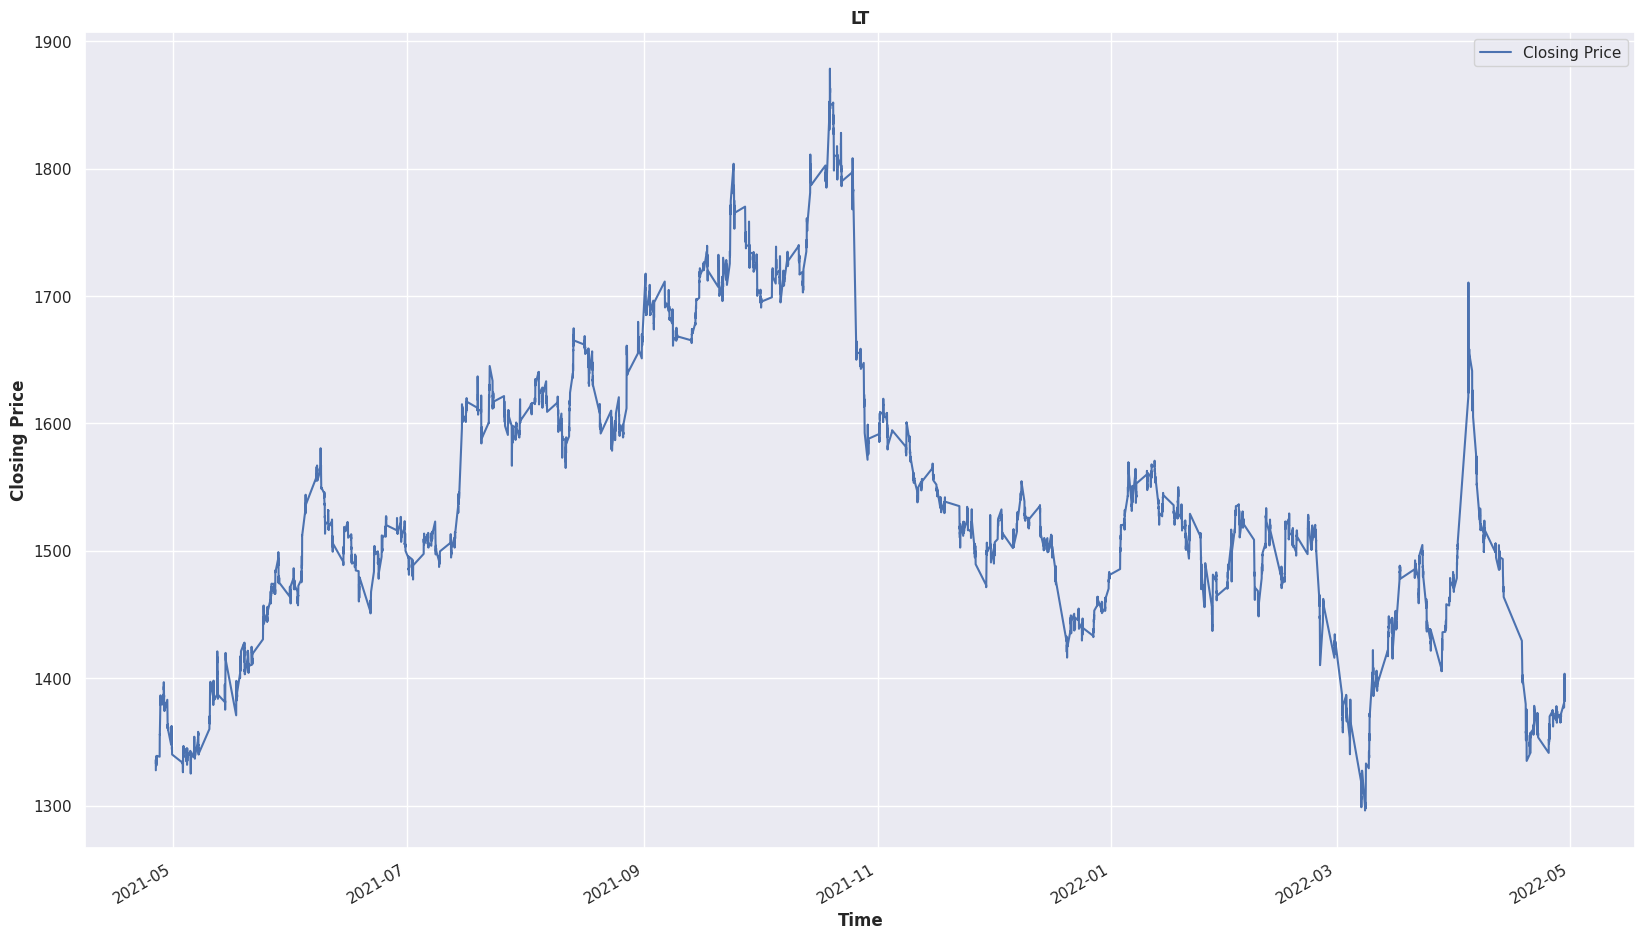

In [15]:
close_ds.plot(x='time', y='close', figsize=(20, 12))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Time', fontweight='bold')
plt.title("LT", fontweight='bold')
plt.legend(['Closing Price'])

In [28]:
from time import time
from datetime import datetime

"""
  Parameters
    d - previous number of data points to use for EMA
    price - stock price list
  Returns
    list of EMA of all points starting from the dth data point
"""
def calculate_ema(d, price) :
  print(f" Days {d} \n Length of prices {len(price)}")
  # formula https://www.investopedia.com/terms/e/ema.asp
  ema = []                                    # stores the ema starting from the dth data point i.e corresponding to price[d]
  ema_yesterday = sum(price[:d])/d            # sma of first d days, this will serve as the EMA of yesterday
  multiplier = 2/(d+1)                        # multiplier
  for i in range(d,len(price)):
    ema_today = price[i]*multiplier + ema_yesterday*(1-multiplier)
    ema.append(ema_today)
    ema_yesterday = ema_today
  print(f" Length of EMA list {len(ema)}")
  return ema



"""
  Parameters
    df - original dataframe
  Returns
    list of vwap
"""

def calculate_vwap(df):
    # Convert "time" column to datetime
    df["time"] = pd.to_datetime(df["time"], errors='coerce')

    # Convert 'high', 'low', 'close', and 'volume' columns to numeric, forcing errors to NaN
    df['high'] = pd.to_numeric(df['high'], errors='coerce')
    df['low'] = pd.to_numeric(df['low'], errors='coerce')
    df['close'] = pd.to_numeric(df['close'], errors='coerce')
    df['volume'] = pd.to_numeric(df['volume'], errors='coerce')

    # Drop rows where any of these columns have NaN
    df = df.dropna(subset=['high', 'low', 'close', 'volume'])

    # Reset index after filtering
    df = df.reset_index(drop=True)

    sum_pv = 0
    sum_volume = 0

    vwap = []

    previous_day = df["time"].dt.day[0]

    for i in range(len(df)):
        current_day = df["time"].dt.day[i]

        if current_day != previous_day:
            sum_pv = 0
            sum_volume = 0

        previous_day = current_day

        high = df["high"].iloc[i]
        low = df["low"].iloc[i]
        close = df["close"].iloc[i]
        volume = df["volume"].iloc[i]

        sum_pv += ((high + low + close) / 3) * volume
        sum_volume += volume
        vwap.append(sum_pv / sum_volume)

    return vwap


In [29]:
# price list
price = list(close_ds.drop('time', axis=1).values)
print(f"len prices = {len(price)}")

# ema taking 10 previous points for calculation
ema = calculate_ema(10,price)
print(f"len ema = {len(ema)}")

vwap = calculate_vwap(raw_data)
print(f"len vwap = {len(vwap)}")

len prices = 6304
 Days 10 
 Length of prices 6304
 Length of EMA list 6294
len ema = 6294
len vwap = 6304


In [30]:
# make all ema, vwap, prices lists of equal length
price = price[-len(ema):]
vwap = vwap[-len(ema):]

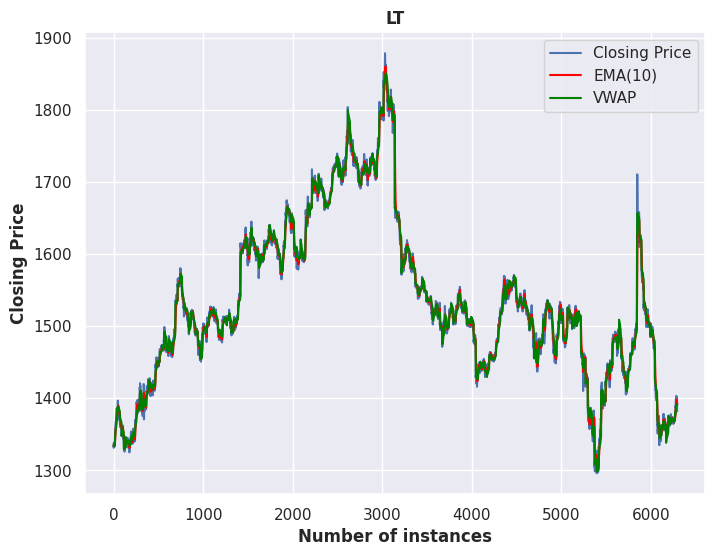

In [32]:
plt.figure(figsize=(8,6))
plt.title("LT", fontweight='bold')
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
plt.plot(price)
plt.plot(ema, color='red')
plt.plot(vwap,color='green')
plt.legend(['Closing Price','EMA(10)','VWAP'])
plt.show()

In [33]:
# split a multivariate sequence into samples
# n_steps ---> number of lag observations

def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [34]:
ema = np.array(ema).reshape(len(ema), 1)
vwap = np.array(vwap).reshape(len(vwap), 1)
price = np.array(price).reshape(len(price), 1)
dataset = np.hstack((ema, vwap, price))
print(dataset)

[[1334.92590909 1333.89988029 1337.45      ]
 [1335.05756198 1334.01312673 1335.65      ]
 [1334.39255071 1333.94921584 1331.4       ]
 ...
 [1395.44575064 1391.91844298 1393.65      ]
 [1393.69197779 1391.6925569  1385.8       ]
 [1391.56616365 1391.11755162 1382.        ]]


In [35]:
n_steps = 3
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
print(X[0], y[0])

(6292, 3, 3) (6292,)
[[1334.92590909 1333.89988029 1337.45      ]
 [1335.05756198 1334.01312673 1335.65      ]
 [1334.39255071 1333.94921584 1331.4       ]] 1331.4


In [36]:
# train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
# type(X_train.values)

(4404, 3, 3)
(4404,)
(1888, 3, 3)
(1888,)


In [37]:
X_test

array([[[1555.60365604, 1557.68997295, 1549.2       ],
        [1553.67571858, 1556.87355645, 1545.        ],
        [1551.95286066, 1556.19931326, 1544.2       ]],

       [[1553.67571858, 1556.87355645, 1545.        ],
        [1551.95286066, 1556.19931326, 1544.2       ],
        [1549.33415872, 1555.56752012, 1537.55      ]],

       [[1551.95286066, 1556.19931326, 1544.2       ],
        [1549.33415872, 1555.56752012, 1537.55      ],
        [1548.00067531, 1554.79856684, 1542.        ]],

       ...,

       [[1396.39920774, 1391.87566676, 1389.95      ],
        [1395.84480633, 1391.89427931, 1393.35      ],
        [1395.44575064, 1391.91844298, 1393.65      ]],

       [[1395.84480633, 1391.89427931, 1393.35      ],
        [1395.44575064, 1391.91844298, 1393.65      ],
        [1393.69197779, 1391.6925569 , 1385.8       ]],

       [[1395.44575064, 1391.91844298, 1393.65      ],
        [1393.69197779, 1391.6925569 , 1385.8       ],
        [1391.56616365, 1391.11755162, 138

In [38]:
print(X_test)

[[[1555.60365604 1557.68997295 1549.2       ]
  [1553.67571858 1556.87355645 1545.        ]
  [1551.95286066 1556.19931326 1544.2       ]]

 [[1553.67571858 1556.87355645 1545.        ]
  [1551.95286066 1556.19931326 1544.2       ]
  [1549.33415872 1555.56752012 1537.55      ]]

 [[1551.95286066 1556.19931326 1544.2       ]
  [1549.33415872 1555.56752012 1537.55      ]
  [1548.00067531 1554.79856684 1542.        ]]

 ...

 [[1396.39920774 1391.87566676 1389.95      ]
  [1395.84480633 1391.89427931 1393.35      ]
  [1395.44575064 1391.91844298 1393.65      ]]

 [[1395.84480633 1391.89427931 1393.35      ]
  [1395.44575064 1391.91844298 1393.65      ]
  [1393.69197779 1391.6925569  1385.8       ]]

 [[1395.44575064 1391.91844298 1393.65      ]
  [1393.69197779 1391.6925569  1385.8       ]
  [1391.56616365 1391.11755162 1382.        ]]]


In [39]:
print(y_test)

[1544.2  1537.55 1542.   ... 1393.65 1385.8  1382.  ]


In [40]:
# flattening input for model feeding

# n_input = X_train.shape[1] * X_train.shape[2]
# X_train_flattened = X_train.reshape((X_train.shape[0], n_input))
# X_test_flattened = X_test.reshape((X_test.shape[0], n_input))
# print(X_train_flattened.shape)
# print(X_test_flattened.shape)

In [41]:
# Model training

from tensorflow import keras
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import LSTM
from keras.layers import Conv2D, MaxPool2D
from keras.layers import Dense, LSTM, RepeatVector, TimeDistributed, Flatten, Bidirectional

# Vanilla LSTM

model_lstm_vanilla = Sequential()
model_lstm_vanilla.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_vanilla.add(Dense(1))
model_lstm_vanilla.compile(loss='mse', optimizer=keras.optimizers.Adam(learning_rate=0.0003))
model_lstm_vanilla.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,851 (42.39 KB)

 Trainable params: 10,851 (42.39 KB)

 Non-trainable params: 0 (0.00 B)

In [42]:
# Stacked LSTM

model_lstm_stacked = Sequential()
model_lstm_stacked.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_stacked.add(LSTM(50, activation='relu'))
model_lstm_stacked.add(Dense(1))
model_lstm_stacked.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_stacked.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 3, 50)               │          10,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,051 (121.29 KB)

 Trainable params: 31,051 (121.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
# Bidirectional LSTM

model_lstm_bidirectional = Sequential()
model_lstm_bidirectional.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(X_train.shape[1], X_train.shape[2])))
model_lstm_bidirectional.add(Dense(1))
model_lstm_bidirectional.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003), loss='mse')
model_lstm_bidirectional.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100)                 │          21,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 21,701 (84.77 KB)

 Trainable params: 21,701 (84.77 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
lstm_vanilla_history = model_lstm_vanilla.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 8s - 59ms/step - loss: 897879.1875 - val_loss: 103564.4844
Epoch 2/50
138/138 - 0s - 3ms/step - loss: 18889.1289 - val_loss: 52.5031
Epoch 3/50
138/138 - 0s - 3ms/step - loss: 31.1698 - val_loss: 52.5598
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 31.1746 - val_loss: 52.7343
Epoch 5/50
138/138 - 0s - 3ms/step - loss: 31.2325 - val_loss: 52.9766
Epoch 6/50
138/138 - 0s - 3ms/step - loss: 31.2517 - val_loss: 53.4334
Epoch 7/50
138/138 - 1s - 4ms/step - loss: 31.2443 - val_loss: 53.9785
Epoch 8/50
138/138 - 1s - 5ms/step - loss: 31.2444 - val_loss: 54.8697
Epoch 9/50
138/138 - 0s - 3ms/step - loss: 31.1979 - val_loss: 56.1918
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 31.1936 - val_loss: 57.6697
Epoch 11/50
138/138 - 1s - 5ms/step - loss: 31.2858 - val_loss: 59.6518
Epoch 12/50
138/138 - 0s - 3ms/step - loss: 31.3204 - val_loss: 60.7294
Epoch 13/50
138/138 - 0s - 3ms/step - loss: 31.3148 - val_loss: 61.8132
Epoch 14/50
138/138 - 0s - 3ms/step - loss: 35.1050 - val_los

In [45]:
lstm_stacked_history = model_lstm_stacked.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 6s - 43ms/step - loss: 1312743.0000 - val_loss: 64600.3867
Epoch 2/50
138/138 - 1s - 4ms/step - loss: 3778.1025 - val_loss: 63.2120
Epoch 3/50
138/138 - 1s - 5ms/step - loss: 38.5150 - val_loss: 70.6164
Epoch 4/50
138/138 - 1s - 5ms/step - loss: 38.3261 - val_loss: 71.0974
Epoch 5/50
138/138 - 1s - 4ms/step - loss: 41.9966 - val_loss: 70.8138
Epoch 6/50
138/138 - 1s - 4ms/step - loss: 41.9418 - val_loss: 70.6805
Epoch 7/50
138/138 - 1s - 4ms/step - loss: 41.9636 - val_loss: 70.7085
Epoch 8/50
138/138 - 0s - 3ms/step - loss: 41.9704 - val_loss: 71.2737
Epoch 9/50
138/138 - 1s - 5ms/step - loss: 42.0500 - val_loss: 70.6426
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 41.9878 - val_loss: 70.6511
Epoch 11/50
138/138 - 1s - 4ms/step - loss: 41.9693 - val_loss: 70.6363
Epoch 12/50
138/138 - 1s - 4ms/step - loss: 42.0022 - val_loss: 70.9303
Epoch 13/50
138/138 - 1s - 5ms/step - loss: 41.9548 - val_loss: 70.7873
Epoch 14/50
138/138 - 1s - 4ms/step - loss: 41.9215 - val_loss

In [46]:
lstm_bidirectional_history = model_lstm_bidirectional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, verbose=2)

Epoch 1/50
138/138 - 5s - 36ms/step - loss: 1228153.3750 - val_loss: 403252.9688
Epoch 2/50
138/138 - 1s - 4ms/step - loss: 125828.7266 - val_loss: 532.4603
Epoch 3/50
138/138 - 1s - 4ms/step - loss: 61.0469 - val_loss: 85.9171
Epoch 4/50
138/138 - 1s - 4ms/step - loss: 26.2068 - val_loss: 85.8671
Epoch 5/50
138/138 - 1s - 4ms/step - loss: 26.1921 - val_loss: 85.8326
Epoch 6/50
138/138 - 0s - 3ms/step - loss: 26.1801 - val_loss: 85.8032
Epoch 7/50
138/138 - 1s - 4ms/step - loss: 26.1873 - val_loss: 85.7836
Epoch 8/50
138/138 - 1s - 4ms/step - loss: 26.1567 - val_loss: 85.7800
Epoch 9/50
138/138 - 1s - 5ms/step - loss: 26.1806 - val_loss: 85.7473
Epoch 10/50
138/138 - 1s - 4ms/step - loss: 26.2028 - val_loss: 85.6733
Epoch 11/50
138/138 - 1s - 4ms/step - loss: 26.2007 - val_loss: 85.6960
Epoch 12/50
138/138 - 1s - 5ms/step - loss: 26.1725 - val_loss: 85.6235
Epoch 13/50
138/138 - 1s - 5ms/step - loss: 26.1689 - val_loss: 85.5396
Epoch 14/50
138/138 - 1s - 4ms/step - loss: 26.1852 - val_

Text(0, 0.5, 'MSE')

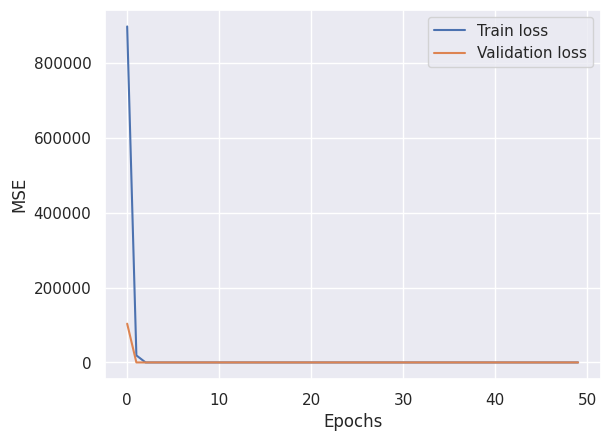

In [47]:
# plots
fig = plt.figure()
plt.plot(lstm_vanilla_history.history['loss'], label='Train loss')
plt.plot(lstm_vanilla_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

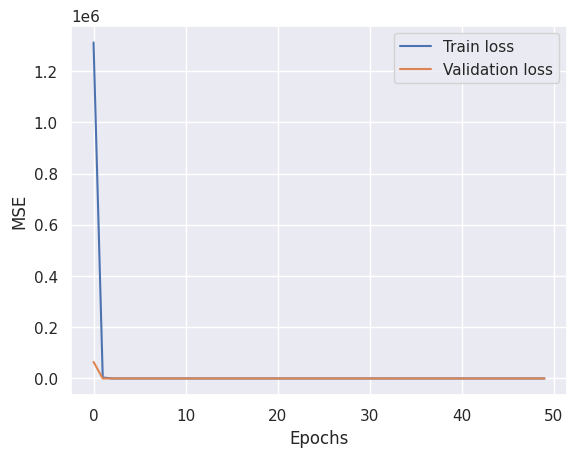

In [48]:
# plots
fig = plt.figure()
plt.plot(lstm_stacked_history.history['loss'], label='Train loss')
plt.plot(lstm_stacked_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

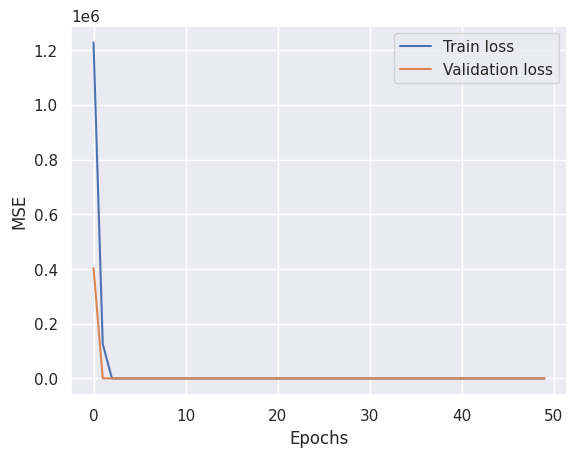

In [49]:
# plots
fig = plt.figure()
plt.plot(lstm_bidirectional_history.history['loss'], label='Train loss')
plt.plot(lstm_bidirectional_history.history['val_loss'], label='Validation loss')
plt.legend(loc='best')
plt.xlabel('Epochs')
plt.ylabel('MSE')

In [50]:
# RMSE calculation
from sklearn.metrics import mean_squared_error
lstm_vanilla_train_pred = model_lstm_vanilla.predict(X_train)
lstm_vanilla_test_pred = model_lstm_vanilla.predict(X_test)
print('Train rmse for vanilla:', np.sqrt(mean_squared_error(y_train, lstm_vanilla_train_pred)))
print('Test rmse for vanilla:', np.sqrt(mean_squared_error(y_test, lstm_vanilla_test_pred)))


lstm_stacked_train_pred = model_lstm_stacked.predict(X_train)
lstm_stacked_test_pred = model_lstm_stacked.predict(X_test)
print('Train rmse for stacked:', np.sqrt(mean_squared_error(y_train, lstm_stacked_train_pred)))
print('Test rmse for stacked:', np.sqrt(mean_squared_error(y_test, lstm_stacked_test_pred)))


lstm_bidirectional_train_pred = model_lstm_bidirectional.predict(X_train)
lstm_bidirectional_test_pred = model_lstm_bidirectional.predict(X_test)
print('Train rmse for bidirectional:', np.sqrt(mean_squared_error(y_train, lstm_bidirectional_train_pred)))
print('Test rmse for bidirectional:', np.sqrt(mean_squared_error(y_test, lstm_bidirectional_test_pred)))

138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for vanilla: 5.6864813162111165
Test rmse for vanilla: 7.420688046414222
138/138 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for stacked: 7.39348044422483
Test rmse for stacked: 8.885539723752348
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Train rmse for bidirectional: 5.278316282450552
Test rmse for bidirectional: 9.152728712343201


In [51]:
print(y_test[0:10])
print(lstm_vanilla_test_pred[0:10])

[1544.2  1537.55 1542.   1541.1  1543.4  1544.45 1546.75 1542.2  1544.45
 1543.7 ]
[[1552.4045]
 [1549.9208]
 [1548.6326]
 [1547.3501]
 [1547.9509]
 [1548.0061]
 [1548.7627]
 [1548.605 ]
 [1548.4768]
 [1547.6904]]


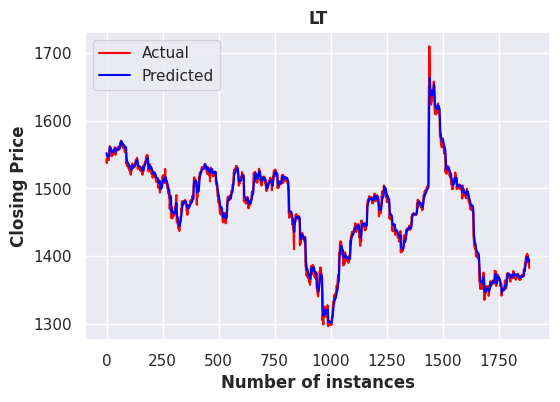

In [53]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("LT", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_vanilla_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

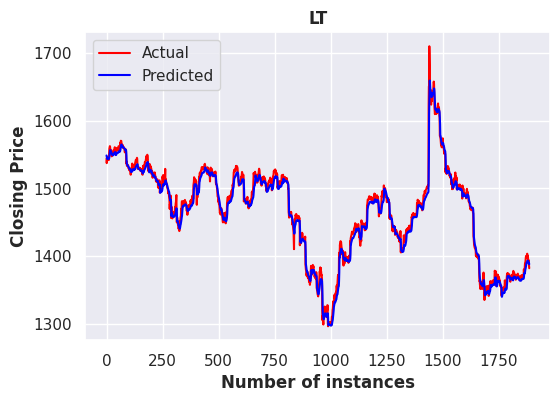

In [55]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("LT", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_stacked_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])

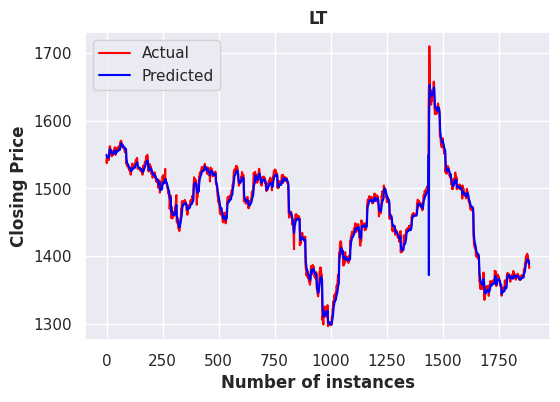

In [57]:
# pd.Series(y_test[:100]).plot(figsize=(30, 10))
# pd.Series(cnn_test_pred.flatten()[:100]).plot(figure=(30, 10))
plt.figure(figsize=(6, 4))
plt.ylabel('Closing Price', fontweight='bold')
plt.xlabel('Number of instances', fontweight='bold')
# displaying the title
plt.title("LT", fontweight='bold')
plt.plot(pd.Series(y_test), color='red')

plt.plot(pd.Series(lstm_bidirectional_test_pred.flatten()), color='blue')
plt.legend(['Actual','Predicted'])